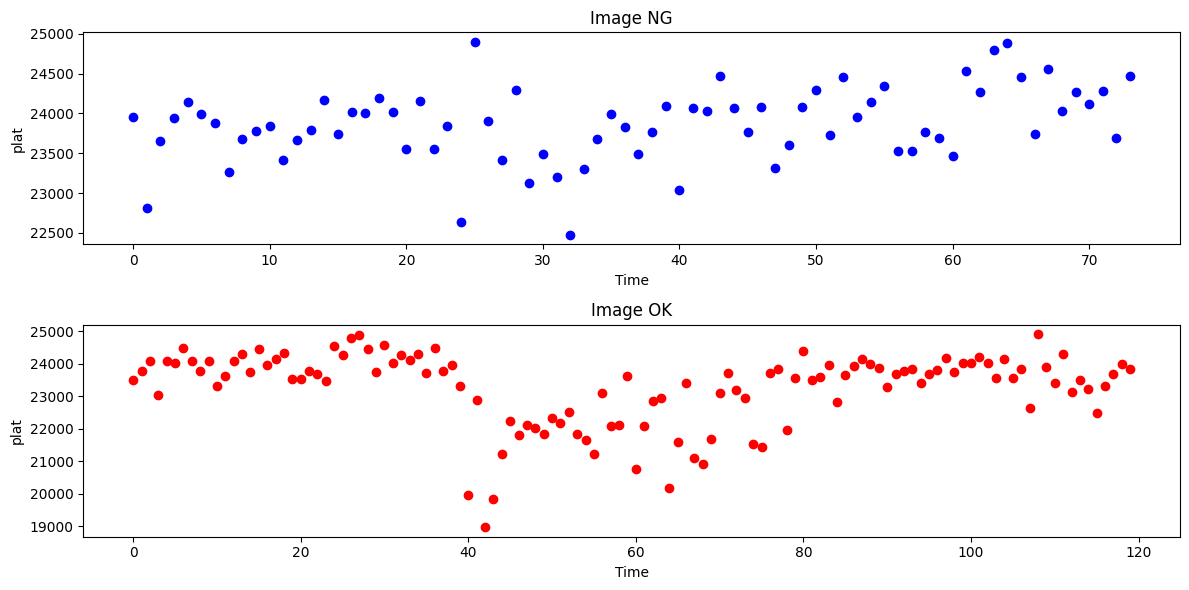

In [1]:
from skimage.filters.rank import entropy
from skimage.morphology import disk
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob


def global_entropy(image):
    hist, _ = np.histogram(image, bins=np.arange(256), density=True)
    hist = hist[hist > 0]
    return -np.sum(hist * np.log2(hist))


def local_entropy(image, neighborhood):
    return entropy(image, neighborhood)


def entropy_threshold(image, neighborhood):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    h, w = gray_image.shape
    total_entropy = global_entropy(gray_image)
    max_info_gain = 0
    best_threshold = 0

    entropy_img = local_entropy(gray_image, neighborhood)

    for threshold in range(1, 255):
        foreground = gray_image[gray_image >= threshold]
        background = gray_image[gray_image < threshold]

        if len(foreground) == 0 or len(background) == 0:
            continue

        p_foreground = len(foreground) / (h * w)
        p_background = len(background) / (h * w)

        entropy_foreground = entropy_img[gray_image <= threshold]
        entropy_background = entropy_img[gray_image > threshold]

        if len(entropy_foreground) == 0 or len(entropy_background) == 0:
            continue

        info_gain = total_entropy - (p_foreground * entropy_foreground.mean() +
                                     p_background * entropy_background.mean())

        if info_gain > max_info_gain:
            max_info_gain = info_gain
            best_threshold = threshold

    _, binary_image = cv2.threshold(gray_image, best_threshold, 255, cv2.THRESH_BINARY)

    return binary_image


def process_images(path):
    time = 0
    time_list = []
    area_list = []
    neighborhood = disk(22)

    for file in glob.glob(path):
        input_image = cv2.imread(file)
        thresholded_image = entropy_threshold(input_image, neighborhood)
        binary_image = np.sum(thresholded_image == 255)
        time_list.append(time)
        area_list.append(binary_image)
        time += 1

    return time_list, area_list


path_a = "aa/*.*"
path_b = "bb/*.*"

time_list_a, area_list_a = process_images(path_a)
time_list_b, area_list_b = process_images(path_b)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time_list_a, area_list_a, 'bo')
plt.title("Image NG")
plt.xlabel("Time")
plt.ylabel("plat")

plt.subplot(2, 1, 2)
plt.plot(time_list_b, area_list_b, 'ro')
plt.title("Image OK")
plt.xlabel("Time")
plt.ylabel("plat")

plt.tight_layout()
plt.show()

In [ ]:
from skimage.filters.rank import entropy
from skimage.morphology import disk
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
from sklearn.mixture import GaussianMixture as GMM



def global_entropy(image):
    hist, _ = np.histogram(image, bins=np.arange(256), density=True)
    hist = hist[hist > 0]
    return -np.sum(hist * np.log2(hist))


def local_entropy(image, neighborhood):
    return entropy(image, neighborhood)


def entropy_threshold(image, neighborhood):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    h, w = gray_image.shape
    total_entropy = global_entropy(gray_image)
    max_info_gain = 0
    best_threshold = 0

    entropy_img = local_entropy(gray_image, neighborhood)
    gmm = GMM(n_components=2, covariance_type='full').fit(entropy_img.reshape(-1, 1))  # Reshape here
    gmm_label = gmm.predict(entropy_img.reshape(-1, 1))  # Reshape here
    entropy_img = gmm_label.reshape(h, w)  
    
    for threshold in range(1, 255):
        foreground = gray_image[gray_image >= threshold]
        background = gray_image[gray_image < threshold]

        if len(foreground) == 0 or len(background) == 0:
            continue

        p_foreground = len(foreground) / (h * w)
        p_background = len(background) / (h * w)

        entropy_foreground = entropy_img[gray_image <= threshold]
        entropy_background = entropy_img[gray_image > threshold]

        if len(entropy_foreground) == 0 or len(entropy_background) == 0:
            continue

        info_gain = total_entropy - (p_foreground * entropy_foreground.mean() +
                                     p_background * entropy_background.mean())

        if info_gain > max_info_gain:
            max_info_gain = info_gain
            best_threshold = threshold

    _, binary_image = cv2.threshold(gray_image, best_threshold, 255, cv2.THRESH_BINARY)

    return binary_image


def process_images(path):
    time = 0
    time_list = []
    area_list = []
    neighborhood = disk(22)

    for file in glob.glob(path):
        input_image = cv2.imread(file)
        thresholded_image = entropy_threshold(input_image, neighborhood)
        binary_image = np.sum(thresholded_image == 255)
        time_list.append(time)
        area_list.append(binary_image)
        time += 1

    return time_list, area_list


path_a = "a/*.*"
path_b = "b/*.*"

time_list_a, area_list_a = process_images(path_a)
time_list_b, area_list_b = process_images(path_b)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time_list_a, area_list_a, 'bo')
plt.title("Image NG")
plt.xlabel("Time")
plt.ylabel("plat")

plt.subplot(2, 1, 2)
plt.plot(time_list_b, area_list_b, 'ro')
plt.title("Image OK")
plt.xlabel("Time")
plt.ylabel("plat")

plt.tight_layout()
plt.show()